# Class Pratical Assigment
#### 21.03.2022



### Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.


### Attribute Information:

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

### References: 
 - https://archive.ics.uci.edu/ml/datasets/Balance+Scale
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/4%20-%20Ensemble%20Methods.ipynb
 - https://github.com/TheAIFramework/PracticalMachineLearning/blob/Trees/3%20-%20Decision%20Trees.ipynb

In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [685]:
df = pd.read_csv('balance-scale.data')

In [686]:
df

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   B       624 non-null    object
 1   1       624 non-null    int64 
 2   1.1     624 non-null    int64 
 3   1.2     624 non-null    int64 
 4   1.3     624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [688]:
df.describe()

,1,1.1,1.2,1.3
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [689]:
# Check null values existence
df.isna().sum()

B      0
1      0
1.1    0
1.2    0
1.3    0
dtype: int64

In [690]:
y = df['B']

In [691]:
# TARGET ARRAY
y

0      R
1      R
2      R
3      R
4      R
      ..
619    L
620    L
621    L
622    L
623    B
Name: B, Length: 624, dtype: object

In [692]:
y.value_counts()

R    288
L    288
B     48
Name: B, dtype: int64

In [693]:
X = df
# drop one column by name
X.drop('B', axis=1, inplace=True)

In [694]:
# FEATURE MATRIX
X

,1,1.1,1.2,1.3
0,1,1,1,2
1,1,1,1,3
2,1,1,1,4
3,1,1,1,5
4,1,1,2,1
...,...,...,...,...
619,5,5,5,1
620,5,5,5,2
621,5,5,5,3
622,5,5,5,4


In [695]:
X.corr()

,1,1.1,1.2,1.3
1,1.000000,-0.003215,-0.003215,-0.003215
1.1,-0.003215,1.000000,-0.003215,-0.003215
1.2,-0.003215,-0.003215,1.000000,-0.003215
1.3,-0.003215,-0.003215,-0.003215,1.000000


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Manu

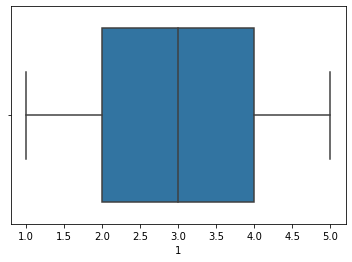

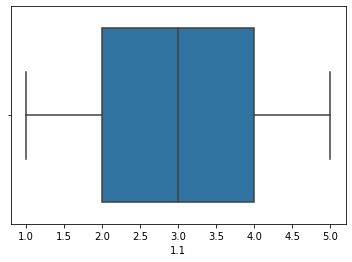

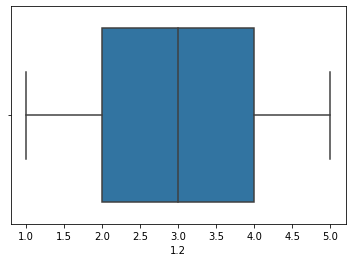

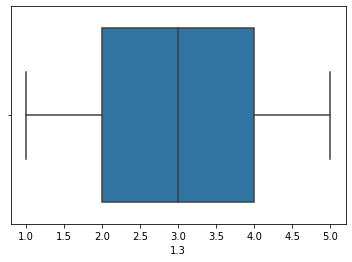

In [696]:
# Check for outliers in dataset
X_columns = X.columns
for col in X_columns:
    fig = plt.figure()
    sns.boxplot(X[col])

#### Notes:
 - Neither null values or outliers were found in the feature dataset!
 - Not much to say about features correlation...
 - Target values seem very balanced

## Data Training/Test Splitting

In [697]:
# 80/20 training and testing splitting - Pareto principle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [698]:
# series = []
# for i in range(1, 5):
#     split_size = round(0.1*i, 1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)
#     series.append([X_train, X_test, y_train, y_test])
    
# % de splitting
# modelo | accuracy_treino | accuracy_teste

##  Decision Tree Classifier
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [699]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

dtc_model = DecisionTreeClassifier(max_depth=5) 
dtc_model.fit(X_train, y_train)

pred_train = dtc_model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = dtc_model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8577154308617234
Testing Accuracy:  0.744


In [700]:
# grid search (GridSearchCV) tries parameters exhaustively and is precise but slow
# random search (RandomizedSearchCV) tries parameters randomly and is less precise but much faster

from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
         'splitter':('best', 'random'), 
         'max_depth' : [1,2,3,4,5,10], 
         'min_samples_leaf' : [1, 2, 3, 4, 5, 10, 100]}

DecisionTreeClassifierAlgorithm = DecisionTreeClassifier() 
ModelGridSearch = GridSearchCV(DecisionTreeClassifierAlgorithm, parameters)

In [701]:
ModelGridSearch.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'splitter': ('best', 'random')})

In [702]:
ModelGridSearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, splitter='random')

In [703]:
pred_train = dtc_model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = dtc_model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8577154308617234
Testing Accuracy:  0.744


In [704]:
dtc_result = pd.DataFrame({'Model': ['Decision Tree'], 'Train Accuracy': [acc_train], 'Test Accuracy': [acc_test]})
# results.append(dict1, ignore_index=True)

In [705]:
dtc_result

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.857715,0.744


## Bagging
A Bagging model works by dividing a dataset, training one tree per subset, and averaging the results. There are variants of the Bagging approach with distinct names determined by how the data is divided (i.e. Pasting, Bagging, Random Subspaces, Random Patches, etc...).

Bagging is an ensemble algorithm, in that multiple models are combined to produce a net result that outperforms any of the individual models. This approach can significantly reduce the amount of variance in the prediction results.

In [706]:
# Decision Trees Classifier using Bagging
from sklearn.ensemble import BaggingClassifier

# we are training the same tree but using bagging
# set the number of estimators to the number of CPUs on your computer

# used best decision tree classifier previously estimated
mb = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10),
#                        n_estimators=, default 10
                       verbose=1,
                       n_jobs=-1)

mb.fit(X_train, y_train)

pred_train = mb.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = mb.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Training Accuracy:  0.87374749498998
Testing Accuracy:  0.832


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.4s remaining:    7.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [707]:
bdtc_result = pd.DataFrame({'Model': ['Bagging Decision Tree'], 'Train Accuracy': [acc_train], 'Test Accuracy': [acc_test]})

In [708]:
r1 = dtc_result.append(bdtc_result, ignore_index=True)

In [709]:
r1

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.857715,0.744
1,Bagging Decision Tree,0.873747,0.832


## Random Forest
Random forest is a supervised machine learning algorithm used to solve classification as well as regression problems. It is a type of ensemble learning technique in which multiple decision trees are created from the training dataset and the majority output from them is considered as the final output.

In [710]:
from sklearn.ensemble import RandomForestClassifier

In [711]:
rfc_model = RandomForestClassifier(max_depth=7, verbose=1, n_jobs=-1)

rfc_model.fit(X_train, y_train)

pred_train = rfc_model.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = rfc_model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Training Accuracy:  0.969939879759519
Testing Accuracy:  0.872


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [712]:
param = {
    'criterion':('gini', 'entropy'),
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30],
    'n_estimators': [5, 10, 15, 20, 25, 30]}
rand = RandomForestClassifier()
RandomGridSearch = GridSearchCV(rand, param, n_jobs=-1)

In [713]:
RandomGridSearch.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                       20, 30],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [714]:
RandomGridSearch.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=15)

In [715]:
pred_train = RandomGridSearch.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = RandomGridSearch.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8917835671342685
Testing Accuracy:  0.864


In [716]:
rfc_result = pd.DataFrame({'Model': ['Random Forest Tree'], 'Train Accuracy': [acc_train], 'Test Accuracy': [acc_test]})

In [717]:
r2 = r1.append(rfc_result, ignore_index=True)

In [718]:
r2

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.857715,0.744
1,Bagging Decision Tree,0.873747,0.832
2,Random Forest Tree,0.891784,0.864


## Gradient Tree Boosting

In [719]:
from xgboost import XGBClassifier
import xgboost as xgb

In [720]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    callback
    compat
    config
    core
    dask
    data
    libpath
    plotting
    rabit
    sklearn
    tracker
    training

CLASSES
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
            xgboost.core.DeviceQuantileDMatrix
        xgboost.core.DataIter
        xgboost.tracker.RabitTracker
    sklearn.base.BaseEstimator(builtins.object)
        xgboost.sklearn.XGBModel
            xgboost.sklearn.XGBClassifier(xgboost.sklearn.XGBModel, sklearn.base.ClassifierMixin)
                xgboost.sklearn.XGBRFClassifier
            xgboost.sklearn.XGBRanker(xgboost.sklearn.XGBModel, xgboost.sklearn.XGBRankerMixIn)
            xgboost.sklearn.XGBRegressor(xgboost.sklearn.XGBModel, sklearn.base.RegressorMixin)
                xgboost.sklearn.XGBRFRegressor
 

In [736]:
# Utilizando o método XGBClassifier
clf = XGBClassifier(n_jobs=-1, n_estimators=1000)
eval_set = [(X_test, y_test)]
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

pred_train = clf.predict(X_train)
acc_train = accuracy_score(y_train, pred_train)
print("Training Accuracy: ", acc_train)

pred_test = clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Testing Accuracy: ", acc_test)


[21:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.88418
[1]	validation_0-mlogloss:0.74569
[2]	validation_0-mlogloss:0.66485
[3]	validation_0-mlogloss:0.60410
[4]	validation_0-mlogloss:0.55843
[5]	validation_0-mlogloss:0.52024
[6]	validation_0-mlogloss:0.49429
[7]	validation_0-mlogloss:0.48000
[8]	validation_0-mlogloss:0.46577
[9]	validation_0-mlogloss:0.45487
[10]	validation_0-mlogloss:0.43993
[11]	validation_0-mlogloss:0.43702
[12]	validation_0-mlogloss:0.42302
[13]	validation_0-mlogloss:0.41772
[14]	validation_0-mlogloss:0.41381
[15]	validation_0-mlogloss:0.41081
[16]	validation_0-mlogloss:0.41228
[17]	validation_0-mlogloss:0.41100
[18]	validation_0-mlogloss:0.41037
[19]	validation_0-mlogloss:0.41160

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [722]:
xgbc_result = pd.DataFrame({'Model': ['XGB Classifier'], 'Train Accuracy': [acc_train], 'Test Accuracy': [acc_test]})

In [723]:
r3 = r2.append(xgbc_result, ignore_index=True)

In [724]:
r3

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.857715,0.744
1,Bagging Decision Tree,0.873747,0.832
2,Random Forest Tree,0.891784,0.864
3,XGB Classifier,1.000000,0.896


In [725]:
# Converter as labels para numérico
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_train_enc = pd.DataFrame(y_train_enc)

y_test_enc = label_encoder.fit_transform(y_test)
y_test_enc = pd.DataFrame(y_test_enc)

In [726]:
y_train_enc

,0
0,0
1,1
2,2
3,0
4,0
...,...
494,2
495,2
496,1
497,2


In [735]:
# Utilizando outro método
param = {'objective':'multi:softmax',
     'eta':0.2,
     'max_depth':15,
     'num_class':54,
     'eval_metric': 'merror',
     'nthread':'32'}

# XGBoost wants the data serialized into a data structure called Dmatrix
dat = xgb.DMatrix(X_train, label=y_train_enc)
datt = xgb.DMatrix(X_test, label=y_test_enc)
watch = [(dat, 'train'), (datt, 'test')]
score = {}

mxgb = xgb.train(param, dat, 45, watch, evals_result=score)

[0]	train-merror:0.20641	test-merror:0.24800
[1]	train-merror:0.17435	test-merror:0.23200
[2]	train-merror:0.12224	test-merror:0.19200
[3]	train-merror:0.10822	test-merror:0.17600
[4]	train-merror:0.09619	test-merror:0.19200
[5]	train-merror:0.09419	test-merror:0.16800
[6]	train-merror:0.09218	test-merror:0.16800
[7]	train-merror:0.08818	test-merror:0.17600
[8]	train-merror:0.08818	test-merror:0.17600
[9]	train-merror:0.08617	test-merror:0.17600
[10]	train-merror:0.07214	test-merror:0.16800
[11]	train-merror:0.06413	test-merror:0.16000
[12]	train-merror:0.06413	test-merror:0.16000
[13]	train-merror:0.05812	test-merror:0.16000
[14]	train-merror:0.05010	test-merror:0.15200
[15]	train-merror:0.04409	test-merror:0.15200
[16]	train-merror:0.04208	test-merror:0.15200
[17]	train-merror:0.03407	test-merror:0.15200
[18]	train-merror:0.03206	test-merror:0.14400
[19]	train-merror:0.02806	test-merror:0.14400
[20]	train-merror:0.02605	test-merror:0.14400
[21]	train-merror:0.02204	test-merror:0.1360

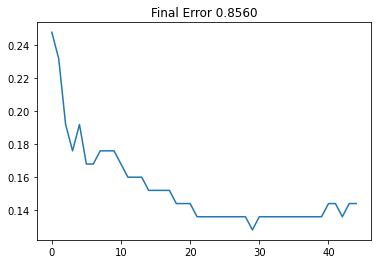

In [728]:
plt.close('all')

epoch = list(range(len(score['test']['merror'])))
pred_y = mxgb.predict(datt)
acc_test = accuracy_score(y_test_enc, pred_y)
plt.plot(epoch, score['test']['merror'], label='test')
plt.title("Final Error %0.4f" % acc_test)
plt.show()

In [729]:
pred_y = mxgb.predict(dat)
acc_train = accuracy_score(y_train_enc, pred_y)
print("Training Accuracy: ", acc_train)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  1.0
Testing Accuracy:  0.856


In [730]:
xgb_result = pd.DataFrame({'Model': ['XGB[Version 2]'], 'Train Accuracy': [acc_train], 'Test Accuracy': [acc_test]})
r4 = r3.append(xgb_result, ignore_index=True)

## Results Overview

In [731]:
r4

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.857715,0.744
1,Bagging Decision Tree,0.873747,0.832
2,Random Forest Tree,0.891784,0.864
3,XGB Classifier,1.000000,0.896
4,XGB[Version 2],1.000000,0.856


#### Random Forest and XGBoost based methods achieved the best model performance!